In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [86]:
df=pd.read_csv('abalone_data.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [87]:
df.shape

(4177, 9)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [89]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [90]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [91]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

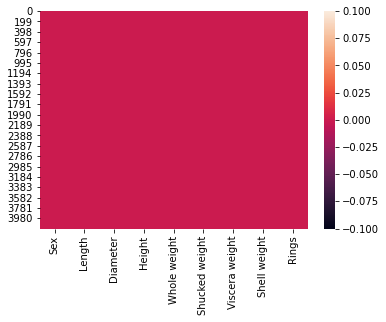

In [92]:
sns.heatmap(df.isnull())

In [93]:
nf = df.select_dtypes(include=[np.number]).columns     #numerical features
nf

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [94]:
cf = df.select_dtypes(include=[np.object]).columns    #categorical features
cf

Index(['Sex'], dtype='object')

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

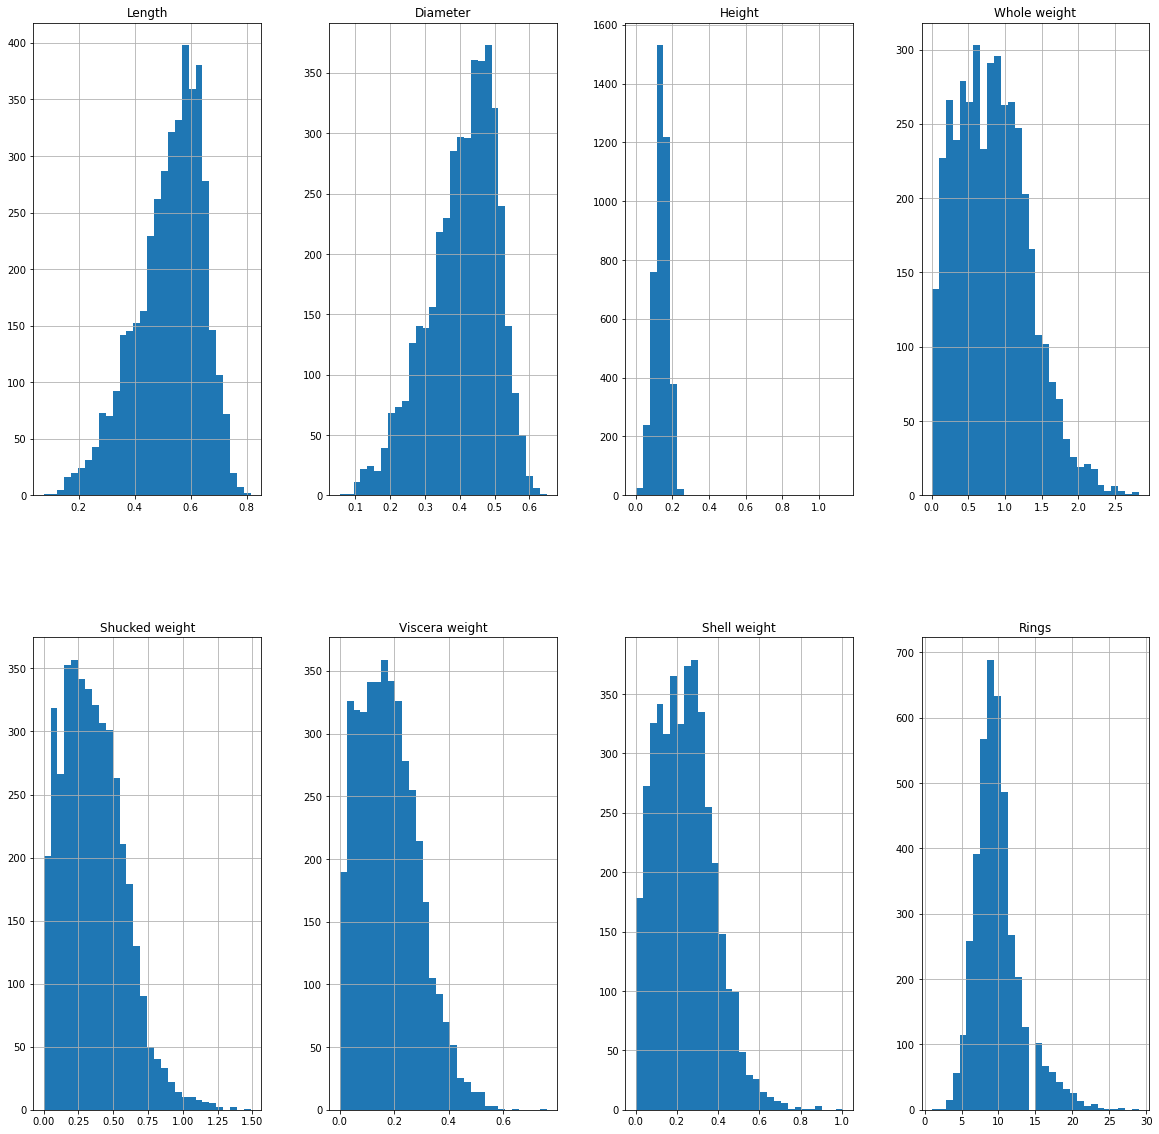

In [95]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

<AxesSubplot:xlabel='Height', ylabel='count'>

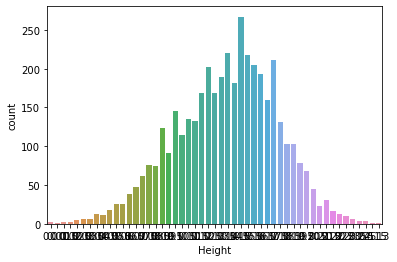

In [96]:
sns.countplot(x='Height',data=df)

<AxesSubplot:xlabel='Rings', ylabel='count'>

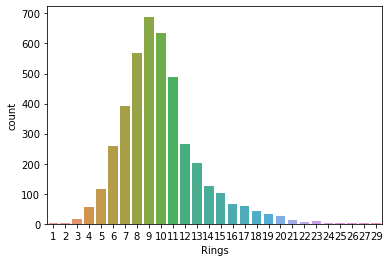

In [97]:
sns.countplot(x='Rings',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

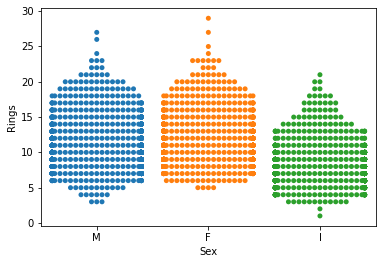

In [98]:
sns.swarmplot(x='Sex',y='Rings',data=df)

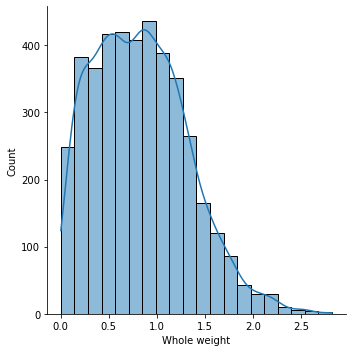

In [99]:
sns.displot(df['Whole weight'],bins=20,kde=True)

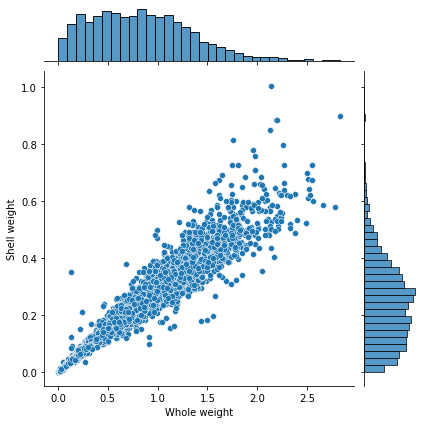

In [100]:
sns.jointplot(x='Whole weight',y='Shell weight',data=df,)

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

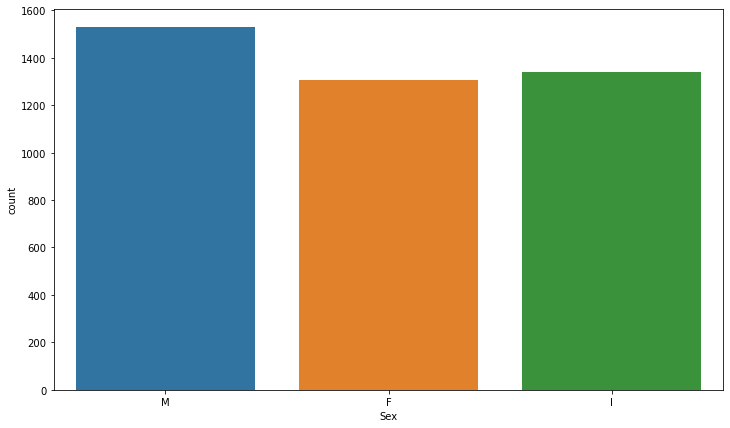

In [101]:
plt.figure(figsize=[12,7])
sns.countplot(df['Sex'],data=df)
df['Sex'].value_counts()

Length               AxesSubplot(0.125,0.536818;0.168478x0.343182)
Diameter          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Viscera weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Rings                AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

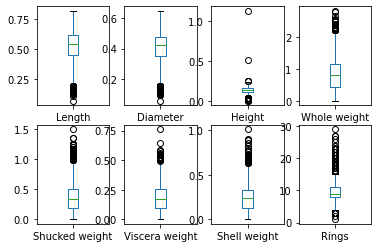

In [102]:
df.plot(kind='box',layout=(2,4),subplots=True)

<AxesSubplot:>

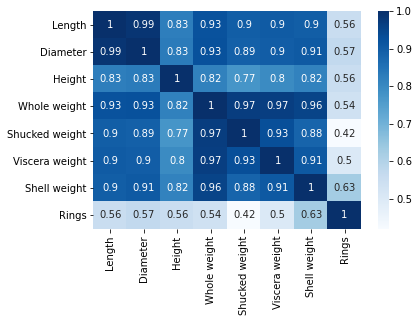

In [103]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [104]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [105]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [106]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [107]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [108]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [109]:
data_loss = (((4177-4027)/4177)*100)
data_loss

3.5910940866650707

In [123]:
df = df_new.drop(['Sex'],axis=1)

In [124]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [125]:
df.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [126]:
x=df.iloc[:,0:-1]
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [127]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [129]:
x_train.shape

(2698, 7)

In [130]:
y_train.shape

(2698,)

In [131]:
x_test.shape

(1329, 7)

In [132]:
lg=LogisticRegression()
lg

LogisticRegression()

In [133]:
lg.fit(x_train,y_train)

LogisticRegression()

In [134]:
pred=lg.predict(x_test)
print(pred)

[ 8  9  8 ... 10  9  9]


In [135]:
print('accuracy_score:',accuracy_score(y_test,pred))

accuracy_score: 0.2588412340105342


In [136]:
print(confusion_matrix(y_test,pred))

[[  0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   9   9   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   4  18   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1  19  41  12   2   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8  59  34  12   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   6  24  56  92  13   0   0   0   0   0   0   0   0   0]
 [  0   0   0   3  17  30 109  56   3   0   0   0   0   0   0   0   0]
 [  0   0   0   1  19  24  82  76  10   0   0   0   0   0   0   0   0]
 [  0   0   0   2   7  11  45  72  21   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3  10  31  46  12   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   5  25  25   9   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   6  13  20   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3  16  12   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   4  10   6   0   0   0   0   0   0   0   0]
 [  0 

In [137]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        19
           5       0.24      0.15      0.19        26
           6       0.29      0.25      0.27        76
           7       0.33      0.51      0.40       115
           8       0.29      0.29      0.29       191
           9       0.25      0.50      0.33       218
          10       0.21      0.36      0.27       212
          11       0.25      0.13      0.17       158
          12       0.00      0.00      0.00       102
          13       0.00      0.00      0.00        65
          14       0.00      0.00      0.00        45
          15       0.00      0.00      0.00        36
          16       0.00      0.00      0.00        22
          17       0.00      0.00      0.00        16
          18       0.00      0.00      0.00         8
          19       0.00      0.00      0.00        17

    accuracy              

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.23024830699774265
[[ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5 10  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6 10  7  2  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 12 28 24  7  3  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  8 25 38 29  9  4  1  0  0  0  0  0  0  0  0]
 [ 0  0  4 16 42 58 46 17  5  2  1  0  0  0  0  0  0]
 [ 0  0  2  7 24 40 64 48 24  2  6  0  1  0  0  0  0]
 [ 0  0  0  8 16 37 58 60 23  5  4  0  1  0  0  0  0]
 [ 0  0  0  3  7 21 48 41 29  4  2  2  1  0  0  0  0]
 [ 0  0  0  1  5 12 25 25 19  5  8  1  0  0  0  1  0]
 [ 0  0  0  0  5  8  8 17 10  9  4  2  0  1  1  0  0]
 [ 0  0  0  0  2  5 10 15  4  1  2  3  2  0  0  1  0]
 [ 0  0  0  0  0  3  8  9  7  2  3  1  0  0  2  0  1]
 [ 0  0  0  0  1  2  4  5  1  1  5  0  2  0  1  0  0]
 [ 0  0  0  0  0  2  2  7  1  1  0  0  1  0  2  0  0]
 [ 0  0  0  0  0  0  1  1  2  0  0  0  1  3  0  0  0]
 [ 0  0  0  0  0  0  2  4  4  1  3  1  0  1  1  0  0]]
              precision    recall  f1-score   support

      

In [139]:
from sklearn.svm import SVC
svc=SVC()                             
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.2746425884123401
[[ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  4  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12 10  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 21 38  9  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 14 58 32  8  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7 30 77 66 10  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 19 42 92 50 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 14 24 87 66 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  7 14 43 53 39  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  9 37 37 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6 27 21 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9 16 17  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4 17  9  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  7  8  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  7  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  7  4  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

       

In [140]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.19939804364183597
[[ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  4  5  3  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  8  7  3  1  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  6 23 25 11  3  3  1  0  2  0  0  0  0  0  0]
 [ 0  0  6 22 36 26 14  6  3  2  0  0  0  0  0  0  0]
 [ 0  0  1 12 29 55 47 20 12  5  4  4  0  2  0  0  0]
 [ 0  0  2  3 17 45 41 43 32 17  7  3  6  1  0  0  1]
 [ 0  0  1  4 11 27 49 50 21 15 14  7  4  4  1  3  1]
 [ 0  0  0  1  4 10 21 48 25 18 12  6  4  5  0  1  3]
 [ 0  0  0  0  4  6 16 22 20  9  7  6  6  2  2  2  0]
 [ 0  0  0  0  2  9 10 10  6  9  4  4  4  4  1  0  2]
 [ 0  0  0  1  2  3  6 10  6  2  4  1  6  3  0  1  0]
 [ 0  0  0  0  0  2  8  6  6  3  4  1  3  1  1  0  1]
 [ 0  0  0  0  1  0  3  2  3  2  1  2  2  3  2  0  1]
 [ 0  0  0  0  0  1  2  3  1  1  1  0  2  2  2  1  0]
 [ 0  0  0  0  0  0  1  1  0  0  3  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  3  5  2  1  2  1  1  1  0  1  0]]
              precision    recall  f1-score   support

      